In [75]:
%matplotlib inline

from collections import Counter
import json

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import matplotlib
import numpy as np
import ternary

In [90]:
aggregate_stats = []
with open('aggregate-stats.jsonl') as f:
    for line in f:
        aggregate_stats.append(json.loads(line))
aggregate_stats[-1]

{'game_key': ['mastermind', 'weighted_product', [0.05, 0.9, 0.05]],
 'stats': {'average_pain': 16.675628812499998,
  'average_reward': 10.797808687499998,
  'average_turns': 27.4734375}}

In [91]:
def get_plot_data(game, model, stat):
    data = Counter()
    for aggregate in aggregate_stats:
        game_type = (aggregate['game_key'][0], aggregate['game_key'][1])
        weights = aggregate['game_key'][2]
        if game_type == (game, model):
            data[(weights[2]*100, weights[1]*100, weights[0]*100)] = aggregate['stats'][stat]
    return data

In [92]:
def plot_ternary(data):
    matplotlib.rcParams['figure.figsize'] = (20, 15) 
    scale = 100
    figure, tax = ternary.figure(scale=scale)
    tax.heatmap(data, style="h")
    tax.boundary()
    tax.left_axis_label("Info", fontsize=16)
    tax.right_axis_label("Speed", fontsize=16)
    tax.bottom_axis_label("Reward", fontsize=16)
    tax.ticks(clockwise=True, multiple=10)
    tax.set_title("Heatmap Test: Hexagonal")

In [93]:
def plot_2d(data):
    info_vs_speed = []
    info_vs_reward = []
    reward_vs_speed = []
    for (speed, info, reward), value in data.items():
        if reward == 0:
            info_vs_speed.append([info, value])
        elif speed == 0:
            info_vs_reward.append([info, value])
        elif info == 0:
            reward_vs_speed.append([reward, value])
    info_vs_speed = np.array(info_vs_speed)
    info_vs_reward = np.array(info_vs_reward)
    reward_vs_speed = np.array(reward_vs_speed)
    
    plt.figure(1, figsize=(20,5))
#     plt.suptitle('Wrong Guesses', fontsize=16)
    ax = plt.subplot(131)
    ax.set_title('Info vs Speed')
    plt.scatter(info_vs_speed[:,0], info_vs_speed[:,1])
    ax = plt.subplot(132)
    ax.set_title('Info vs Reward')
    plt.scatter(info_vs_reward[:,0], info_vs_reward[:,1])
    ax = plt.subplot(133)
    ax.set_title('Reward vs Speed')
    plt.scatter(reward_vs_speed[:,0], reward_vs_speed[:,1])
    plt.show()

ValueError: min() arg is an empty sequence

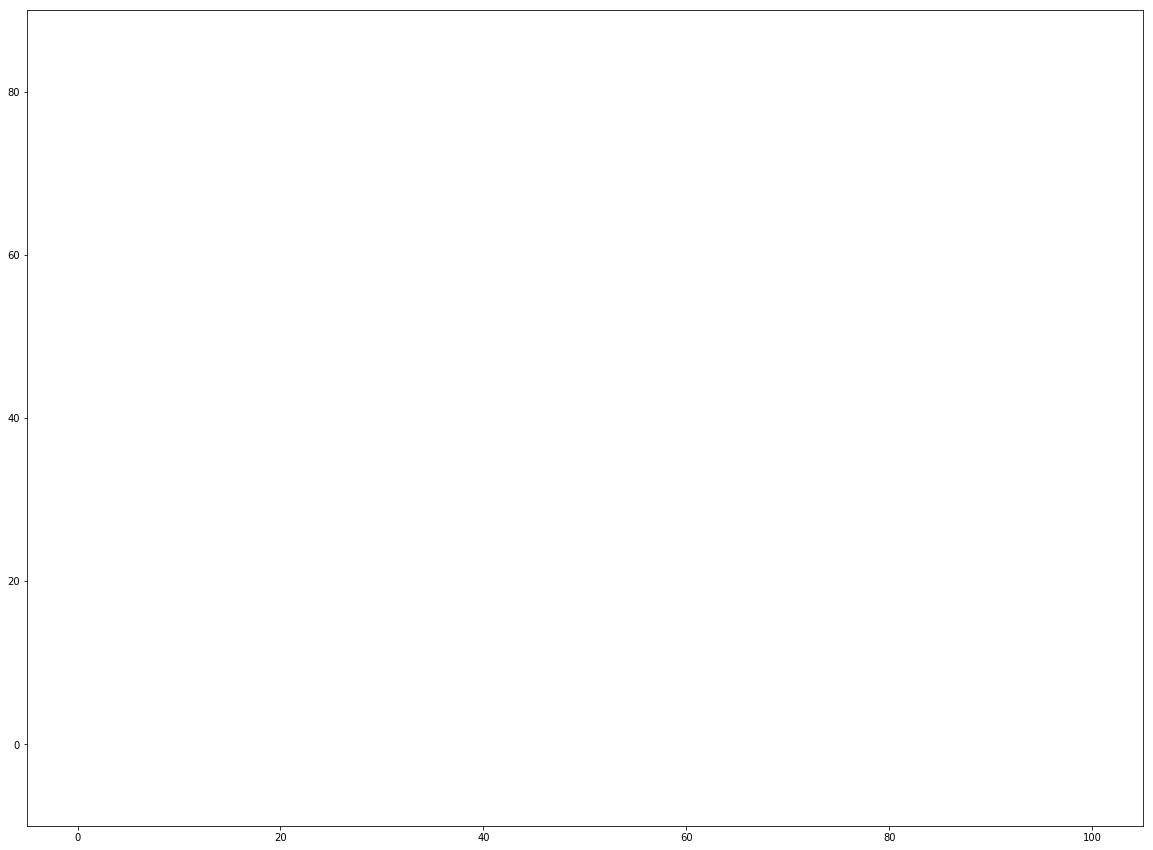

In [94]:
plot_ternary(get_plot_data('mastermind', 'weighted_sum', 'average_turns'))

ValueError: min() arg is an empty sequence

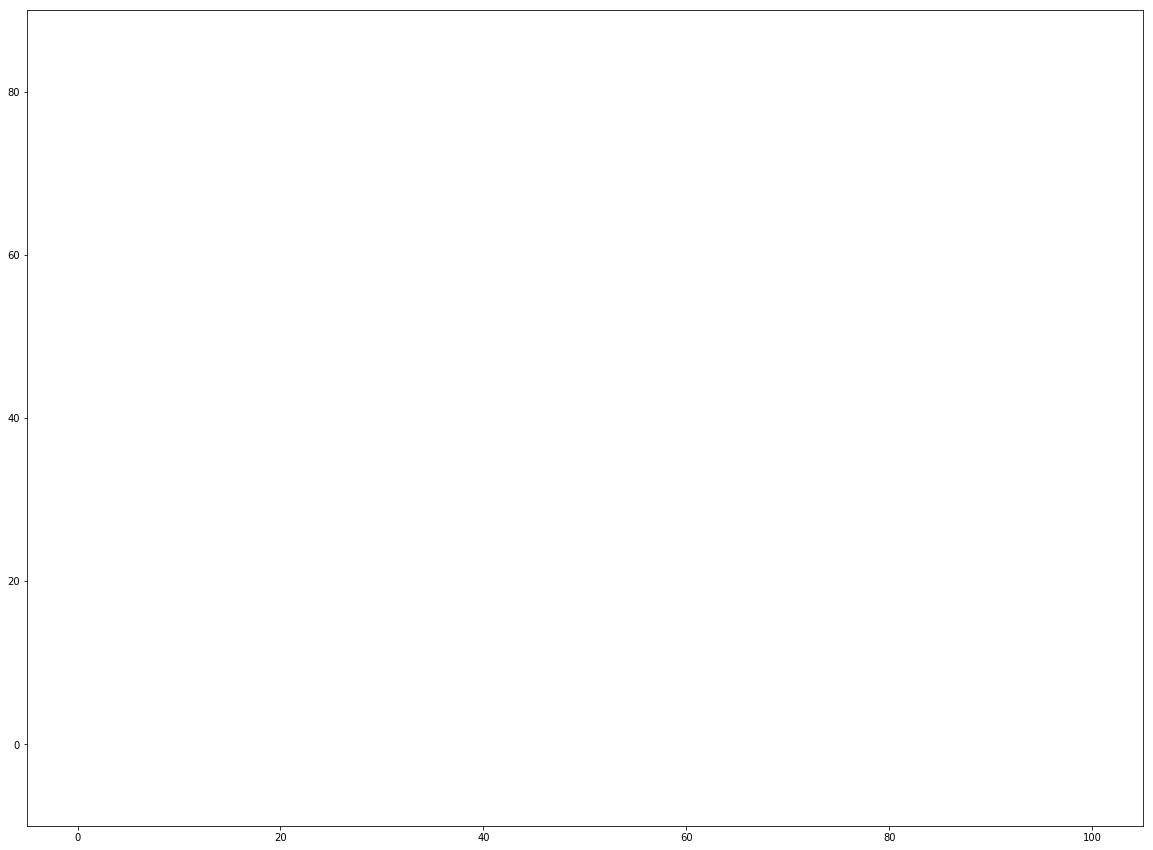

In [95]:
plot_ternary(get_plot_data('mastermind', 'weighted_sum', 'average_reward'))

In [ ]:
plot_ternary(get_plot_data('mastermind', 'weighted_sum', 'average_pain'))

# Average Turns

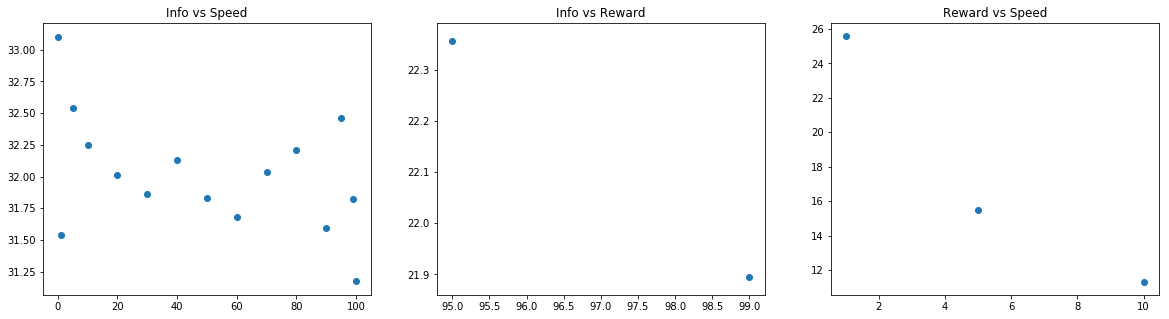

In [96]:
plot_2d(get_plot_data('mastermind', 'weighted_product', 'average_turns'))
# Info vs Reward sigmoid curve

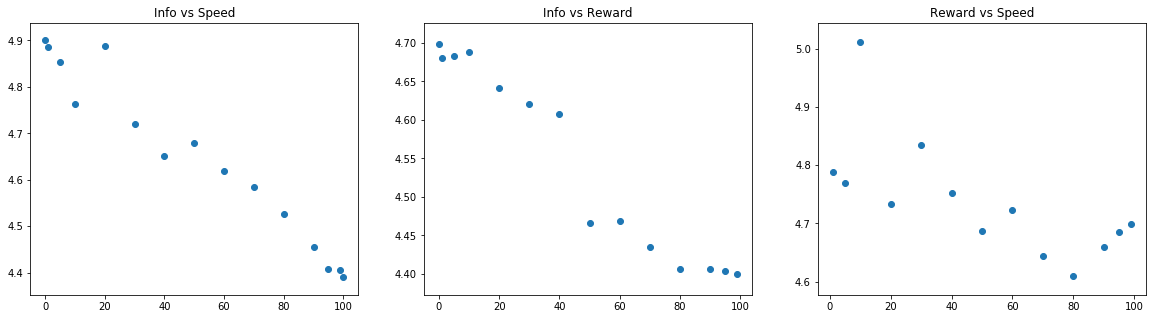

In [84]:
plot_2d(get_plot_data('mastermind', 'weighted_sum', 'average_turns'))
# power rule

# Average Pain

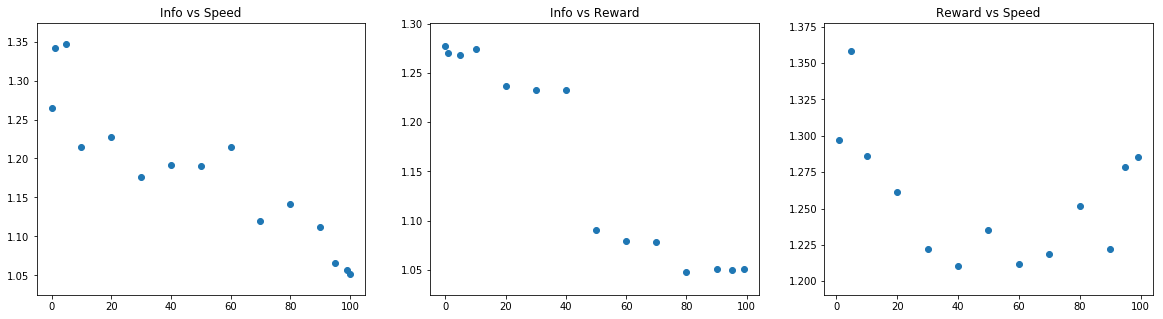

In [85]:
%matplotlib inline
plot_2d(get_plot_data('mastermind', 'weighted_product', 'average_pain'))
# 100% reward doesn't win

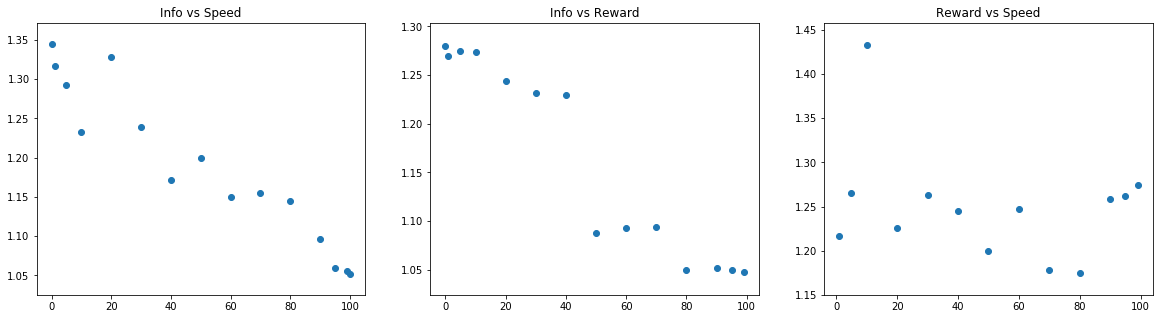

In [86]:
plot_2d(get_plot_data('mastermind', 'weighted_sum', 'average_pain'))

# Average Reward

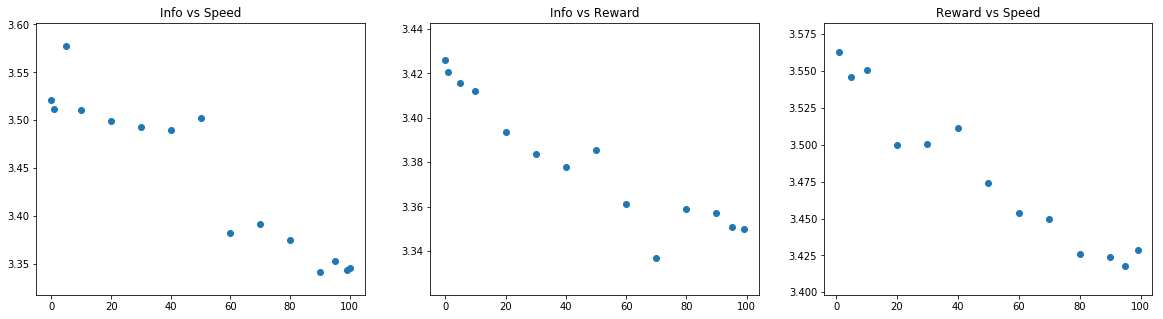

In [88]:
plot_2d(get_plot_data('mastermind', 'weighted_product', 'average_reward'))

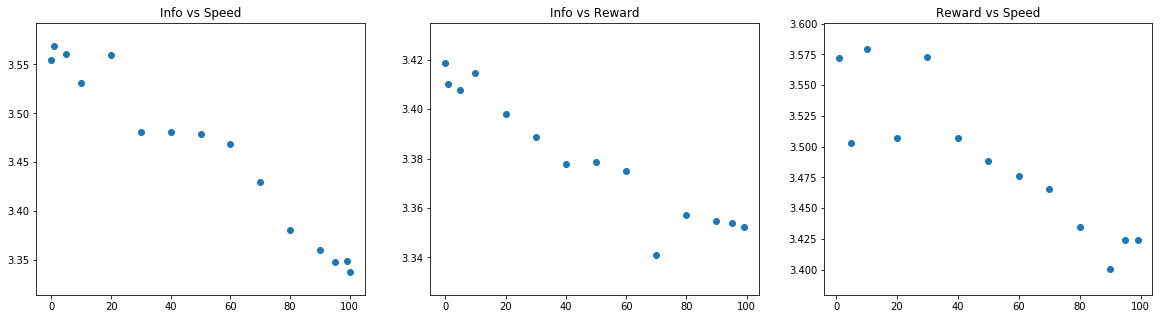

In [89]:
plot_2d(get_plot_data('mastermind', 'weighted_sum', 'average_reward'))

# Mastermind - Average Turns

In [27]:
aggregate_stats = []
with open('aggregate-stats.jsonl') as f:
    for line in f:
        aggregate_stats.append(json.loads(line))
aggregate_stats[-1]

def get_plot_data(game, model, stat):
    data = Counter()
    for aggregate in aggregate_stats:
        game_type = (aggregate['game_key'][0], aggregate['game_key'][1])
        weights = aggregate['game_key'][2]
        if game_type == (game, model):
            data[(weights[2]*100, weights[1]*100, weights[0]*100)] = aggregate['stats'][stat]
    return data

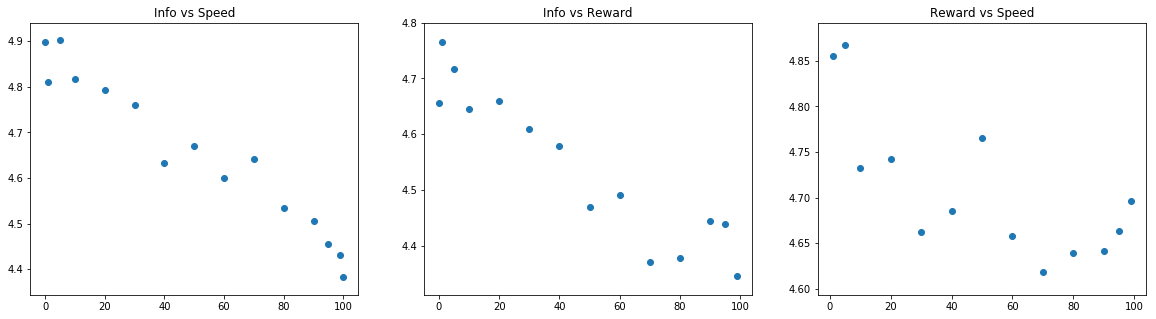

In [28]:
plot_2d(get_plot_data('mastermind', 'weighted_product', 'average_turns'))

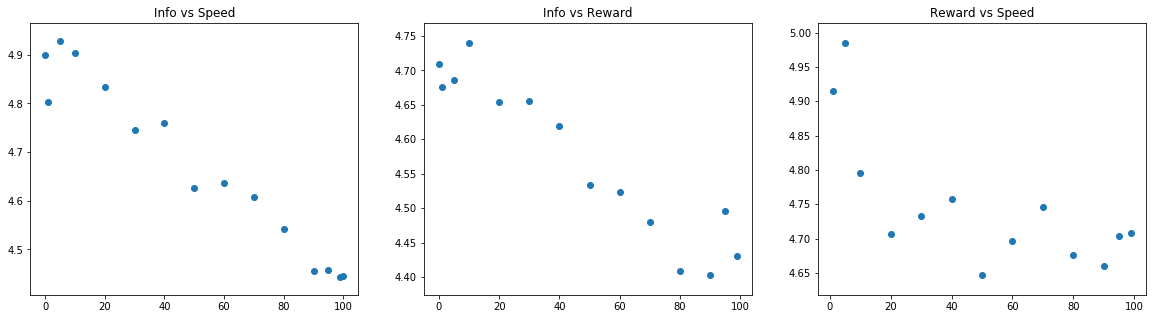

In [29]:
plot_2d(get_plot_data('mastermind', 'weighted_sum', 'average_turns'))

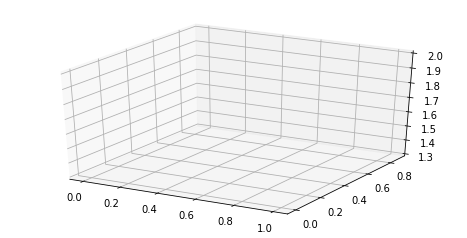

In [39]:
%matplotlib inline
import numpy as np

data = get_plot_data('mastermind', 'weighted_product', 'average_pain')

test_data = []
for (i, j, k), value in data.items():
    test_data.append([i, j, k, value])
test_data = np.array(test_data)
# barycentric coords: (a,b,c)
a=test_data[:,0]/10.0
b=test_data[:,1]/10.0
c=test_data[:,2]/10.0

# values is stored in the last column
Z = test_data[:,-1]

# translate the data to cartesian corrds
X = 0.5 * ( 2.*b+c ) / ( a+b+c )
Y = 0.5*np.sqrt(3) * c / (a+b+c)

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 1, 1, projection='3d')


# X, Y = np.meshgrid(X, Y)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# surf = ax.plot_trisurf(X, Y, Z)
ax.scatter(X, Y, Z)
ax.set_zlim(1.3, 2.0)
# fig.colorbar(surf, shrink=0.5, aspect=10)

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

#===============
# Second subplot
#===============
# set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # X, Y, Z = get_test_data(0.05)
# ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)

plt.show()

In [292]:
test_data[:1]

array([[  5.    ,  90.    ,   5.    ,   1.5822]])